In [52]:
import tensorflow as tf
import cv2
import os
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [53]:
df=pd.read_csv("chinese_mnist.csv")
df.head(5)

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九


In [68]:
class_names=df.character.unique()
labels=[]
data=np.zeros((df.shape[0],64,64,1))
for i in range(df.shape[0]):
    path="data\data\input_"+str(df.loc[i,"suite_id"])+"_"+str(df.loc[i,"sample_id"])+"_"+str(df.loc[i,"code"])+".jpg"
    img=cv2.imread(path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
    img=img/255.0
    img=img.reshape(64,64,1)
    labels.append(df.loc[i,"character"])
    data[i,:,:]=img


In [76]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
int_labels = label_encoder.fit_transform(labels)
# Convert integer labels to one-hot encoding
encoded_labels = to_categorical(int_labels, num_classes=15)



In [77]:
x_train,x_test,y_train,y_test=train_test_split(data,encoded_labels,test_size=0.2,random_state=42)

In [78]:
model=models.Sequential()
model.add(layers.Conv2D(32,(5,5),activation='relu', input_shape=(64,64,1)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((3,3)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((3,3)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(80,activation='relu'))
model.add(layers.Dense(50,activation='relu'))
model.add(layers.Dense(15,activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 60, 60, 32)        832       
                                                                 
 conv2d_28 (Conv2D)          (None, 58, 58, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 19, 19, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 17, 17, 64)        36928     
                                                                 
 conv2d_30 (Conv2D)          (None, 15, 15, 32)        18464     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 32)          0         
 ng2D)                                               

In [81]:
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=11, 
    validation_data=(x_test, y_test)) 

Epoch 1/11
375/375 [==============================] - 117s 308ms/step - loss: 0.0672 - accuracy: 0.9791 - val_loss: 0.0758 - val_accuracy: 0.9773
Epoch 2/11
375/375 [==============================] - 116s 309ms/step - loss: 0.0419 - accuracy: 0.9874 - val_loss: 0.0612 - val_accuracy: 0.9807
Epoch 3/11
375/375 [==============================] - 118s 315ms/step - loss: 0.0424 - accuracy: 0.9861 - val_loss: 0.0576 - val_accuracy: 0.9833
Epoch 4/11
375/375 [==============================] - 116s 310ms/step - loss: 0.0423 - accuracy: 0.9858 - val_loss: 0.0245 - val_accuracy: 0.9943
Epoch 5/11
375/375 [==============================] - 116s 310ms/step - loss: 0.0328 - accuracy: 0.9897 - val_loss: 0.0302 - val_accuracy: 0.9930
Epoch 6/11
375/375 [==============================] - 115s 308ms/step - loss: 0.0298 - accuracy: 0.9908 - val_loss: 0.0226 - val_accuracy: 0.9933
Epoch 7/11
375/375 [==============================] - 116s 309ms/step - loss: 0.0192 - accuracy: 0.9940 - val_loss: 0.0376 -

94/94 - 4s - loss: 0.0344 - accuracy: 0.9913 - 4s/epoch - 41ms/step


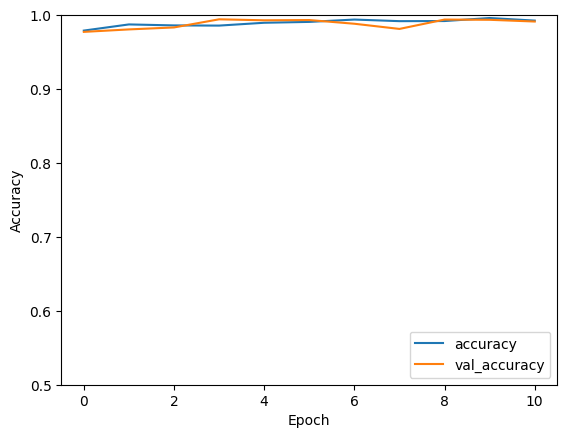

In [83]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [84]:
print(test_acc)

0.9913333058357239
